# 1. Design model
# 2. get loss
# 3. get optimizer
# 4. training loop : 
- forward pass : prediction and loss
- backward pass : compute gradient
- update parametre : update weight based on gradient

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# prepare data
# by default numpy and double
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 42)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [3]:
y # just 1 row

tensor([ 6.2687e+01, -2.3764e+01, -2.5687e+01,  7.9365e+00, -1.5475e+01,
         3.6094e+01, -4.0794e+01, -1.0823e+01,  2.1415e+01,  2.2799e+01,
         3.7224e+01,  8.9567e+01,  4.1551e+01,  1.5018e+01, -6.1876e+01,
         2.1404e+01, -8.9110e+01,  1.8679e+01,  1.4234e+01, -1.2670e+02,
         1.2823e+01,  1.5695e+00, -3.9292e+01,  1.8950e+01,  8.4121e+01,
         6.7974e+01,  3.0328e+00,  6.9943e+00, -4.2729e+01, -7.4268e+01,
         2.5665e+01,  4.3362e+01,  6.3743e-01, -2.1273e+01, -4.9396e+01,
        -1.6240e+01, -2.7917e+01,  7.1497e-02,  6.8466e+01,  1.5671e+01,
         3.0485e+01, -3.4745e+01,  6.0252e+01, -1.9758e+01, -5.4750e+00,
         4.5444e+00, -1.5787e+01, -4.9537e+01,  3.3266e+01,  8.9011e+00,
         1.8640e+00,  1.4416e+01, -5.0219e+01,  1.1638e+02,  3.4709e+01,
         3.5220e+01,  2.6180e+01,  9.1984e+00, -7.9423e+00, -8.7755e+01,
         4.0805e+01, -9.5718e+00, -4.2683e+01, -3.8354e+01, -6.7932e+01,
         5.5239e+01, -8.5184e+01, -8.8515e+01, -2.3

In [4]:
y = y.view(y.shape[0], 1) # row, column
y.shape

torch.Size([100, 1])

In [5]:
X.shape

torch.Size([100, 1])

In [8]:
model = nn.Linear(X.shape[1], 1) #n_features, output
# loss
criterion = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [12]:
# loop
for epoch in range(100):
    y_pred = model(X)
    loss = criterion(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f"Epoch : {epoch+1}, loss = {loss.item()}")

Epoch : 10, loss = 314.235107421875
Epoch : 20, loss = 313.6879577636719
Epoch : 30, loss = 313.2894287109375
Epoch : 40, loss = 312.9990539550781
Epoch : 50, loss = 312.78741455078125
Epoch : 60, loss = 312.63311767578125
Epoch : 70, loss = 312.5205993652344
Epoch : 80, loss = 312.43853759765625
Epoch : 90, loss = 312.37872314453125
Epoch : 100, loss = 312.3349914550781


In [16]:
history = model(X).detach().numpy() # we dont want to update parameteres anymore so dont want to calculate grad

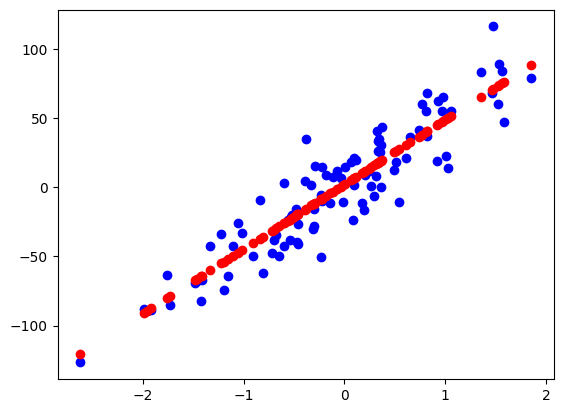

In [24]:
plt.plot(X.numpy(), y.numpy(), "bo")
plt.plot(X.numpy(), history, "ro")
plt.show()